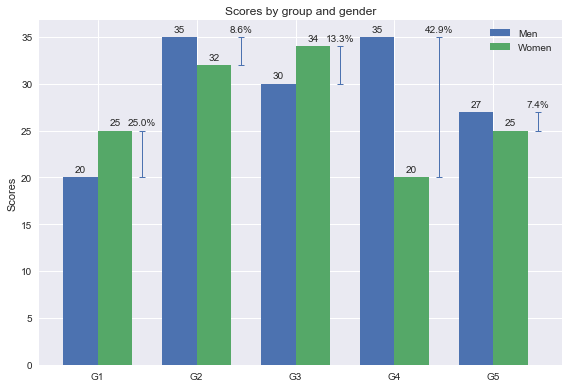

In [1]:
# Grouped bar chart with precentage change bars and labels
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')


men_means = np.array([20, 35, 30, 35, 27])
women_means = np.array([25, 32, 34, 20, 25])

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(ind - width/2, men_means, width, 
                label='Men')
rects2 = ax.bar(ind + width/2, women_means, width,
                label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.

    ha: horizontal alignment
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1)
autolabel(rects2)

# custom error bar 
diff = (men_means - women_means)/2
change_percentage = np.abs((men_means - women_means)/men_means)
errorbar_y = men_means - diff # the y of the error bar
errorbar_x_offset = 0.1


# show the small caps on error bar ends:
# capsize=3 (bar width) AND markeredgewidth=1 (bar width - default is 0)
# elinewidth=1 is the error bar line width
ax.errorbar(ind + width + errorbar_x_offset, errorbar_y,
            yerr=diff, fmt='none', elinewidth=1, 
            capsize=3, markeredgewidth=1)

# show the change percentage labels

errorbar_text_offset = 0.625 # the offset fro the man's bar x location

for i in range(len(rects1)):
    # find the higher bar to determine label height
    height1 = rects1[i].get_height() 
    height2 = rects2[i].get_height()
    height = height1 if height1 > height2 else height2
    
    # add the percentage change labels
    ax.annotate(f'{change_percentage[i]:.1%}', # the text 
                xy=(ind[i] - width/2 + 0.625, height), # x y for the text
                xytext=(0, 3),   # 0 point horizotal and 3 points vertical offsets
                textcoords="offset points",  # in both directions
                ha='center',  # horizontal alignment
                va='bottom') # vertical alignment

fig.tight_layout()

plt.show()

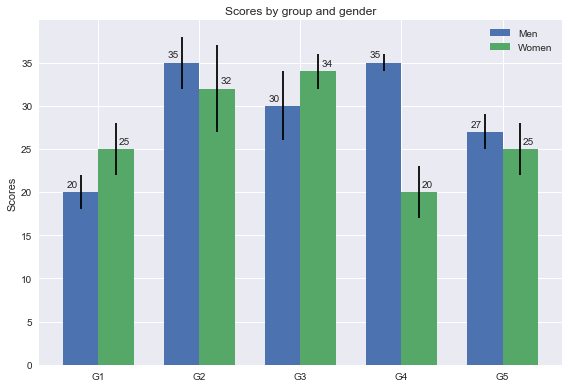

In [2]:
# original example from https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')


men_means, men_std = (20, 35, 30, 35, 27), (2, 3, 4, 1, 2)
women_means, women_std = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_means, width, yerr=men_std,
                label='Men')
rects2 = ax.bar(ind + width/2, women_means, width, yerr=women_std,
                label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.show()